In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, max_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [77]:
df_option = pd.read_pickle("GOOG_trainning_master_data.pkl")

In [78]:
df_option['Target_spread'] = np.log(df_option['Target_spread'])

In [79]:
df_option

,Target_std,Target_spread,prior_std,prior_Vol,prior_spread,prior_range,cut_open,cut_1hr,cut_2hr,cut_3hr,...,vix_cut_2hr,vix_cut_3hr,tqqq_prior_std,tqqq_Vol,tqqq_pr_spread,tqqq_prior_range,tqqq_cut_open,tqqq_cut_1hr,tqqq_cut_2hr,tqqq_cut_3hr
Date_Only,,,,,,,,,,,,,,,,,,,,,
2024-03-20,0.239614,0.019803,0.316430,23082.316667,1.72,1.73,148.89,0.96,0.47,0.29,...,-0.81,-0.78,0.277909,127510.016667,1.40,1.40,60.57,1.04,0.87,0.81
2024-03-21,0.262196,-0.127833,0.829420,32286.996667,2.80,2.83,148.48,0.21,-0.44,-0.27,...,-0.11,-0.07,0.277116,150414.430000,1.18,1.18,63.04,-0.47,-0.88,-0.41
2024-03-22,0.216227,-0.287682,0.370929,31170.190000,2.30,2.08,151.92,0.33,0.52,-0.35,...,0.22,0.10,0.337054,99536.533333,1.20,1.21,63.02,0.12,0.56,0.57
2024-03-25,0.277144,-0.094311,0.334276,21066.500000,1.94,1.84,150.56,0.12,0.06,0.44,...,-0.02,0.04,0.290495,98000.976667,1.44,1.44,62.52,0.16,0.36,0.31
2024-03-26,0.387204,0.104360,0.422641,27582.020000,2.01,1.99,152.64,-0.08,0.16,0.19,...,0.01,0.09,0.173323,95270.283333,0.74,0.75,62.52,0.11,0.00,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-31,0.288903,0.314811,1.022935,41089.793333,3.50,3.51,155.77,0.35,0.13,1.49,...,-0.37,0.06,0.734290,228802.953333,3.40,3.44,56.40,0.97,0.64,1.49
2025-04-01,0.357301,0.378436,0.960278,31208.036667,4.74,4.43,157.62,-1.18,-1.71,-1.63,...,-0.09,0.13,0.810529,226256.846667,3.24,3.25,56.90,-1.04,-1.33,-1.40
2025-04-02,0.310987,0.270027,0.666031,22275.550000,3.45,3.46,157.98,-1.98,-1.10,-0.65,...,0.61,0.17,0.970509,234781.373333,4.97,4.95,58.82,-1.86,-1.29,-0.63


In [80]:
df_option.columns

Index(['Target_std', 'Target_spread', 'prior_std', 'prior_Vol', 'prior_spread',
       'prior_range', 'cut_open', 'cut_1hr', 'cut_2hr', 'cut_3hr',
       'vix_prior_std', 'vix_pr_spread', 'vix_prior_range', 'vix_cut_open',
       'vix_cut_1hr', 'vix_cut_2hr', 'vix_cut_3hr', 'tqqq_prior_std',
       'tqqq_Vol', 'tqqq_pr_spread', 'tqqq_prior_range', 'tqqq_cut_open',
       'tqqq_cut_1hr', 'tqqq_cut_2hr', 'tqqq_cut_3hr'],
      dtype='object')

In [55]:
len(df_option.columns)

25

<Axes: >

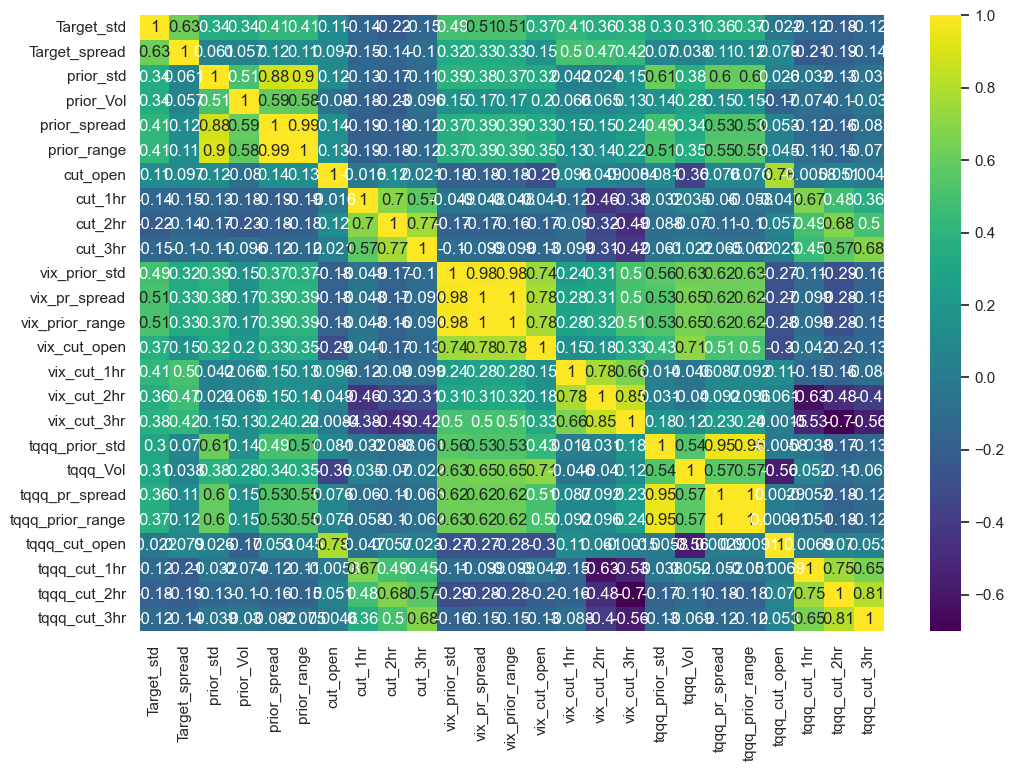

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df_option.corr(numeric_only=True),cmap='viridis',annot=True)

<Axes: ylabel='Frequency'>

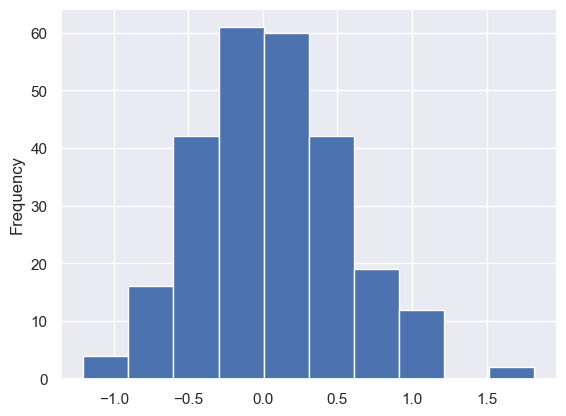

In [81]:
df_option.Target_spread.plot.hist()

In [106]:
np.exp(1.5)

4.4816890703380645

In [43]:
#sns.catplot(x='OP_EXP',y='Target_std',data=df_option, kind='box')

In [82]:
df_option.reset_index(inplace=True)

## Splitting the Data


In [83]:
X = df_option.drop(['Date_Only','Target_std','Target_spread'], axis=1)  
#y = df_option['Target_std']
y = df_option['Target_spread']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [85]:
X_train.columns

Index(['prior_std', 'prior_Vol', 'prior_spread', 'prior_range', 'cut_open',
       'cut_1hr', 'cut_2hr', 'cut_3hr', 'vix_prior_std', 'vix_pr_spread',
       'vix_prior_range', 'vix_cut_open', 'vix_cut_1hr', 'vix_cut_2hr',
       'vix_cut_3hr', 'tqqq_prior_std', 'tqqq_Vol', 'tqqq_pr_spread',
       'tqqq_prior_range', 'tqqq_cut_open', 'tqqq_cut_1hr', 'tqqq_cut_2hr',
       'tqqq_cut_3hr'],
      dtype='object')

In [86]:
X_train.shape

(206, 23)

In [87]:
y_train.shape

(206,)

## Evaluation Run Model with the Data


In [88]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test,preds)
    print(f'mae : {mae}')
   
    
    plt.figure(figsize=(12,8),dpi=200)
    plt.scatter(y_test, preds)
    plt.plot(y_test, y_test, color='green', linestyle='dashed')
    plt.xlabel('real_std')

    return model

----

## Support Vector Regression

In [89]:
from sklearn.svm import SVR

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
scaler = StandardScaler()
sc_X_train = scaler.fit_transform(X_train)
sc_X_test = scaler.transform(X_test)

In [92]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [93]:
grid = GridSearchCV(svr,param_grid)

mae : 0.3197485641321955


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
                         'gamma': ['auto', 'scale']})

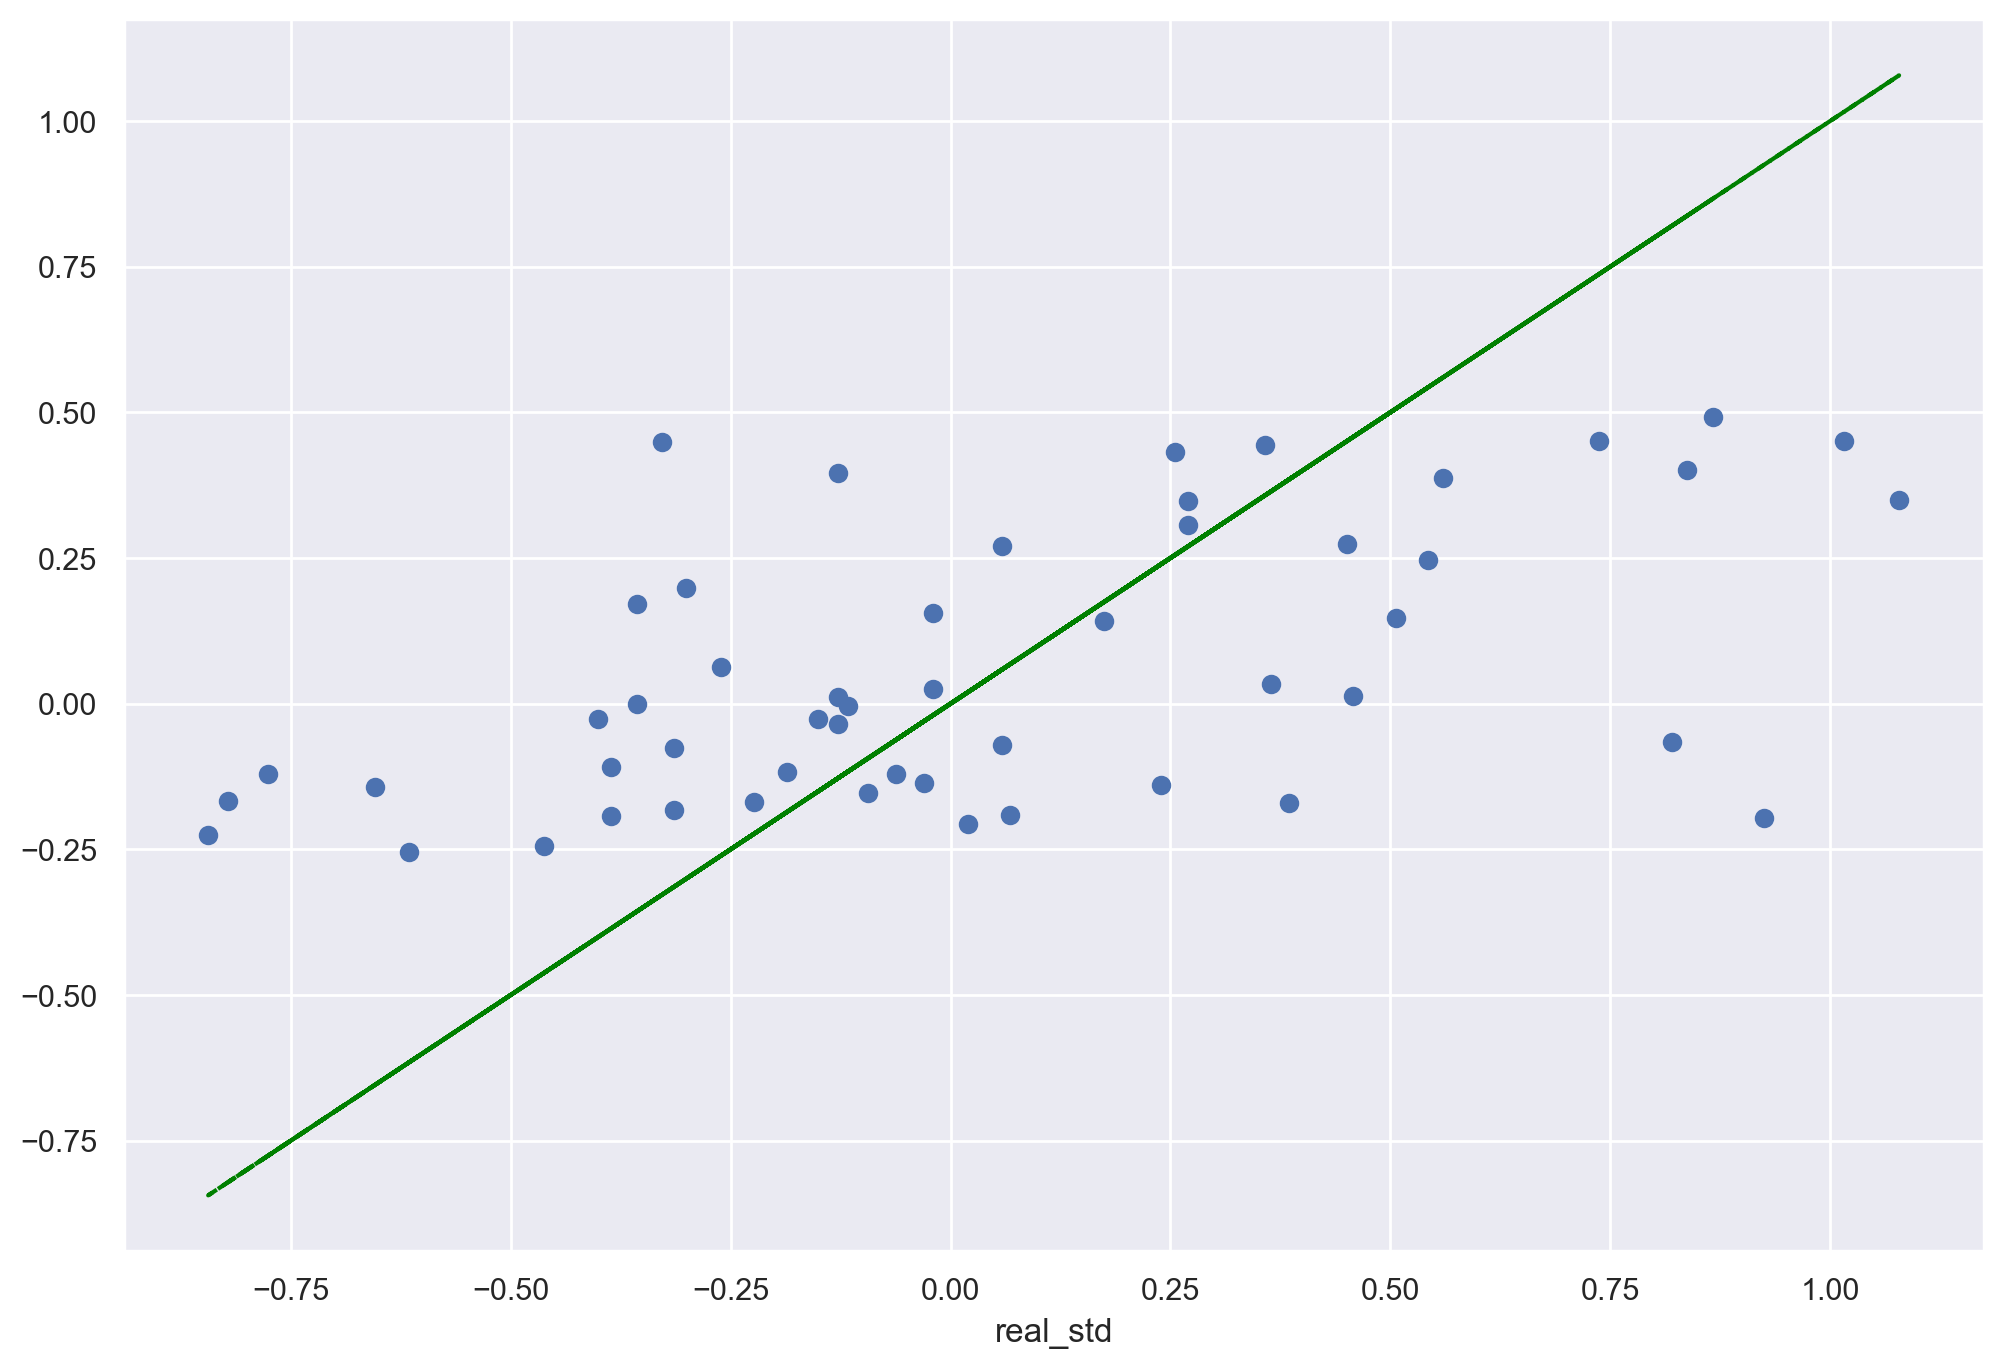

In [94]:
run_model(grid,sc_X_train,y_train,sc_X_test,y_test)

In [95]:
scaler_filename = "scaler4svr.save"
joblib.dump(scaler, scaler_filename)

['scaler4svr.save']

In [96]:
SVR_model = grid.best_estimator_

In [97]:
filename = 'SVR_model_35.joblib'
joblib.dump(SVR_model, filename)

['SVR_model_35.joblib']

---

## Random Forest Regression

## Gradient Boosting


In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
# help(GradientBoostingRegressor)

mae : 0.33912169932730507


GradientBoostingRegressor()

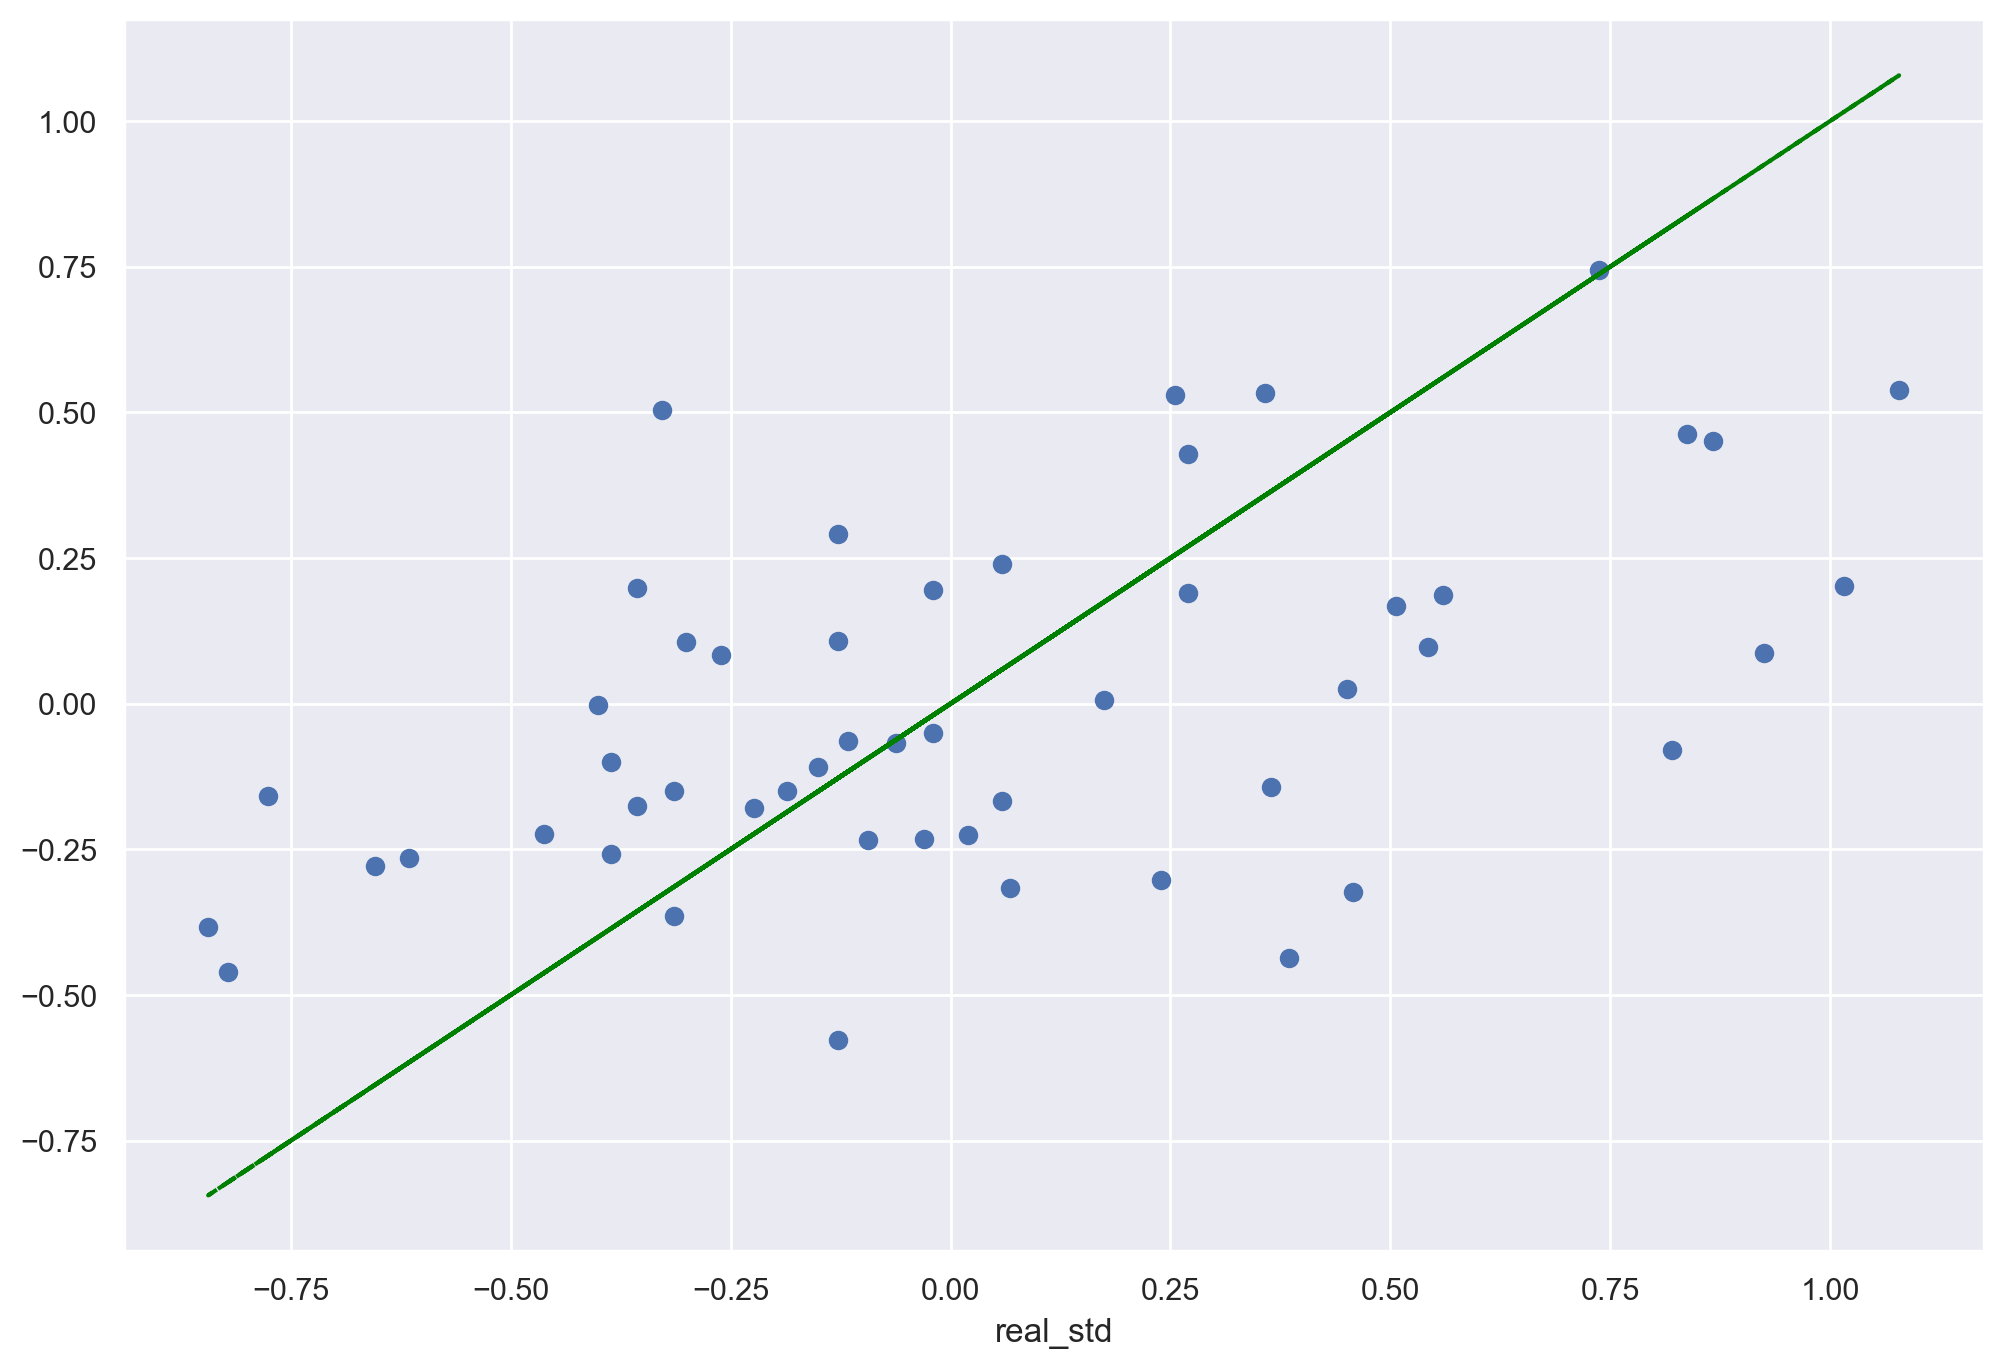

In [100]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [101]:
import xgboost as xgb
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

# Initialize XGBoost regressor
xgbr = xgb.XGBRegressor(objective='reg:absoluteerror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgbr,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=10,
                           verbose=0,
                          n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", np.sqrt(-grid_search.best_score_))

# Evaluate the best model on the test set
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best score: 0.42682289550163893
Test RMSE: 0.4221043301586949


mae : 0.3299936210775066


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

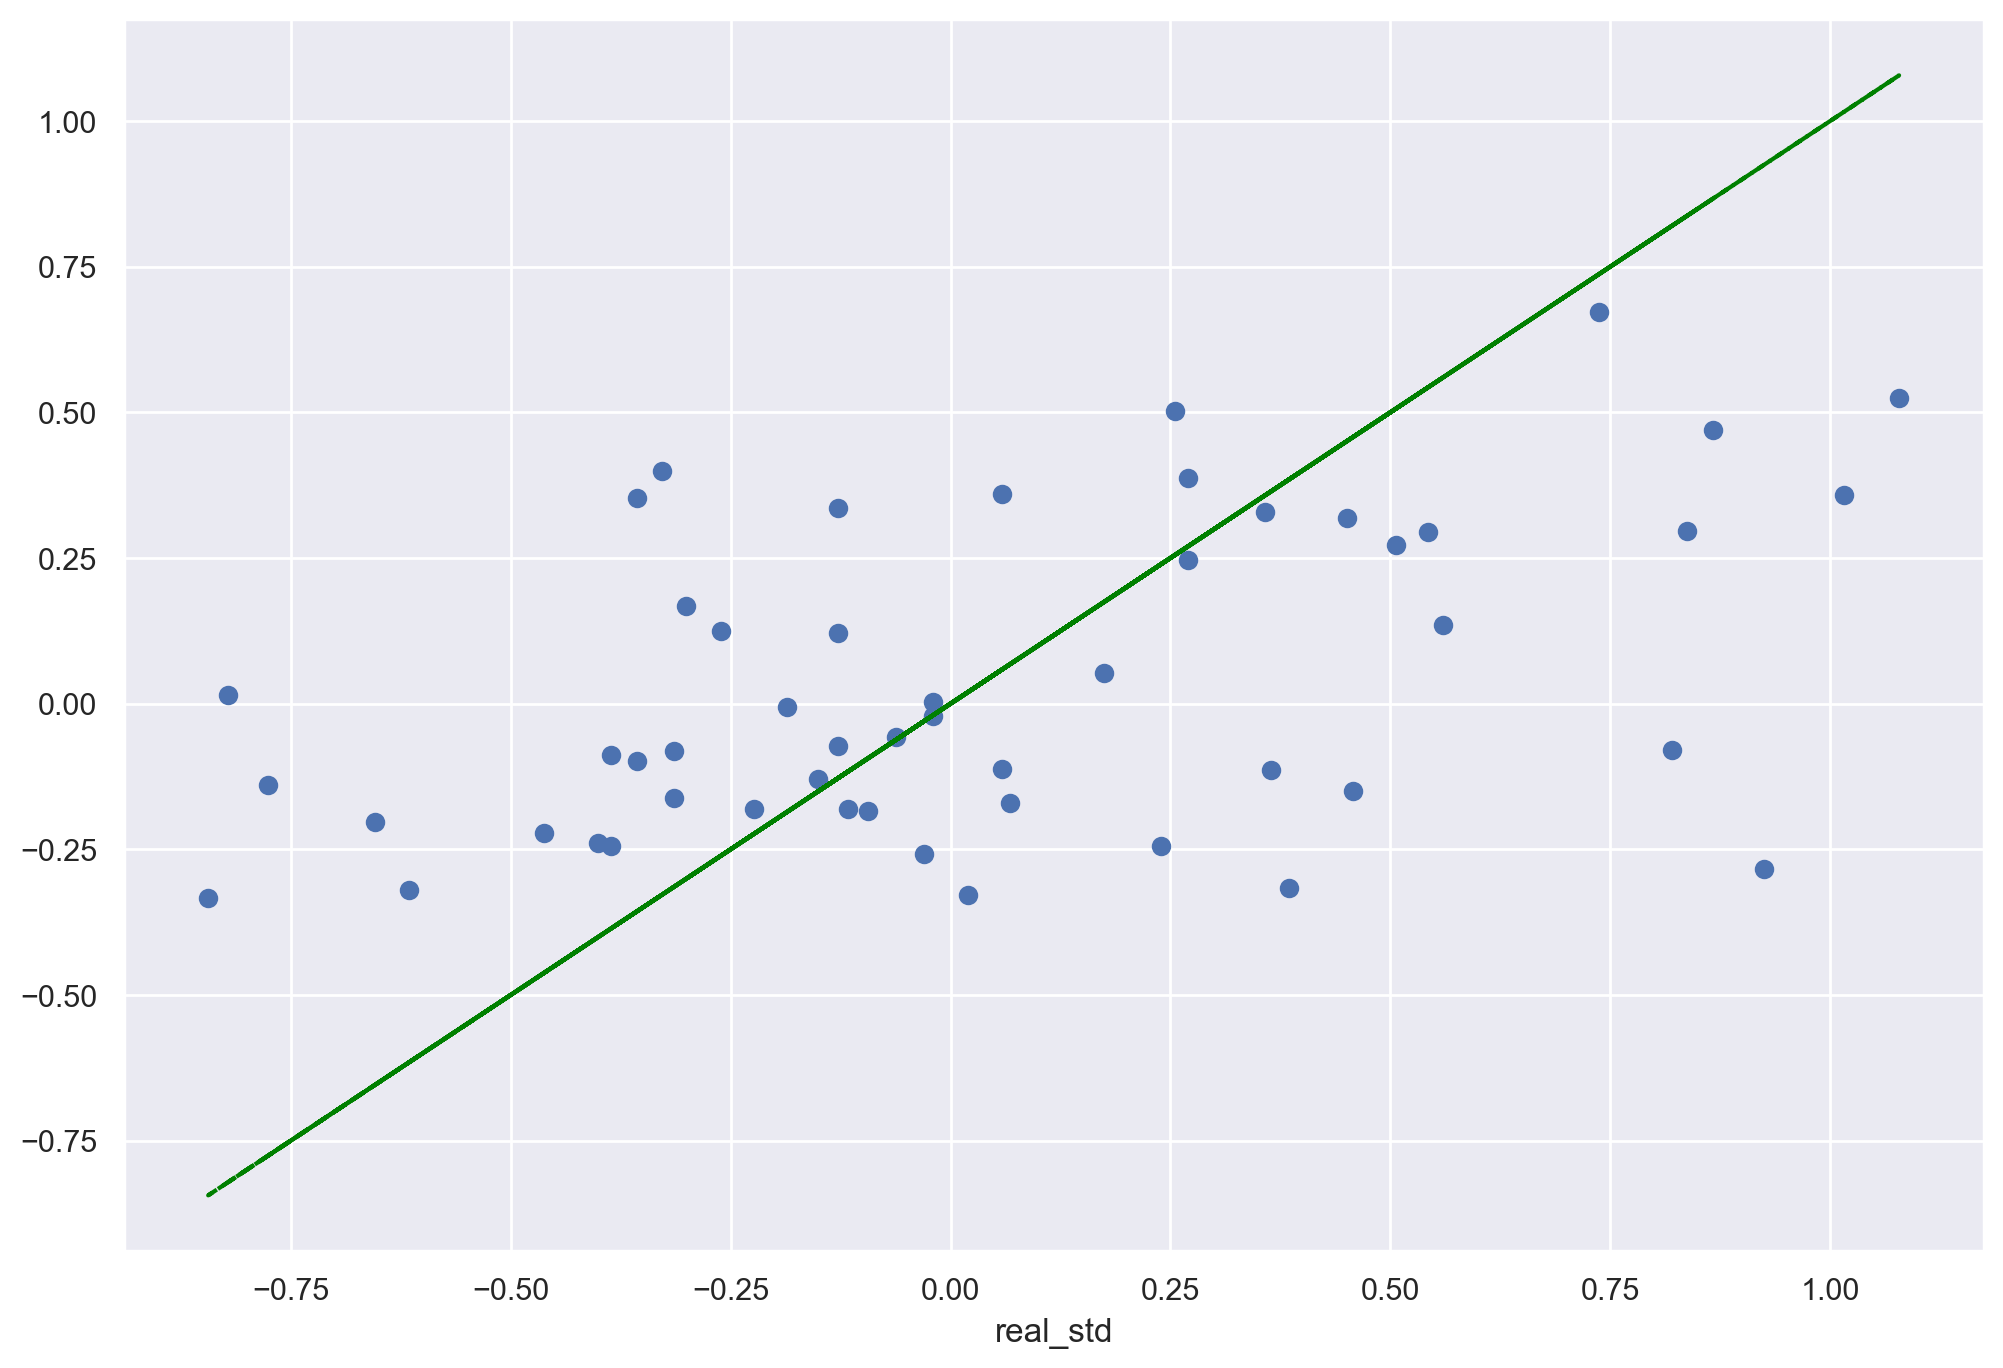

In [102]:
run_model(best_xgb_model,X_train,y_train,X_test,y_test)

In [103]:
pred = best_xgb_model.predict(X_test)

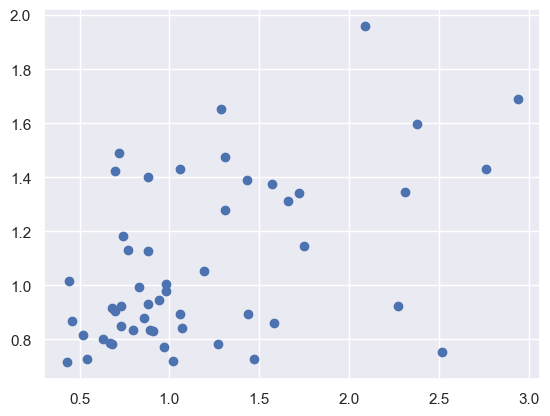

In [105]:
plt.scatter(np.exp(y_test), np.exp(pred))

In [35]:
pd.DataFrame(index=X.columns,data=best_xgb_model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
prior_std,0.030457
prior_Vol,0.034346
prior_spread,0.036136
prior_range,0.061564
cut_open,0.045385
cut_1hr,0.038832
cut_2hr,0.040783
cut_3hr,0.041351
vix_prior_std,0.039501
vix_pr_spread,0.037398


In [ ]:
X_train

In [36]:
import joblib
# Assuming 'model' is your trained model object
filename = 'xgb_model_GOOG_price_spread.joblib'
joblib.dump(best_xgb_model, filename)


['xgb_model_GOOG_price_spread.joblib']

----